# CHEM 101.6 Project1

This is a Jupyter notebook for running and analyzing a Molecular Dynamics (MD) simulations of Butane using the OpenMM engine 


# **Setting the environment for MD calculation**

Firstly, we need to install all necessary libraries and packages for our simulation. The main packages we will be installing are:

1.    OpenMM (https://openmm.org/)
2.    PyTraj (https://amber-md.github.io/pytraj/latest/index.html)
4.    Numpy (https://numpy.org/)
5.    Matplotlib (https://matplotlib.org/)
8.    AmberTools (https://ambermd.org/AmberTools.php)

Load libraries in conda enviroment:

conda install -c conda-forge openmm 

conda install -c conda-forge jupyterlab

conda install -c conda-forge mdtraj




In [10]:
import numpy as np
import platform
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
import sys
import openmm as mm
from openmm import app
from openmm import unit
from openmm import *
from openmm.app import *
from openmm.unit import *
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import scipy.stats as stats
import pandas as pd
from statistics import mean, stdev
from matplotlib import colors
import mdtraj as md
import seaborn as sns


In [12]:
workdir='/Users/NLoui/Desktop/Chem101_S24/Exercise1/'
datadir='/Users/NLoui/Desktop/Chem101_S24/Exercise1/data/'
outdir='/Users/NLoui/Desktop/Chem101_S24/Exercise1/outdir/'
PDB_file_name = datadir+'butane.pdb'
forcefield_file_name = datadir+'butane.gaff2.xml'

#if not os.path.exists(workDir):
#    os.makedirs(workDir)
    
print(PDB_file_name)
print(forcefield_file_name)

pdb = mm.app.PDBFile(PDB_file_name)
forcefield = mm.app.ForceField(forcefield_file_name)

system = forcefield.createSystem(pdb.topology, nonbondedMethod=mm.app.NoCutoff, constraints=mm.app.HBonds)
integrator = mm.LangevinIntegrator(298.15*kelvin, 5.0/picosecond, 2.0*femtoseconds)
integrator.setConstraintTolerance(1e-5)
platform = mm.Platform.getPlatformByName('Reference')
simulation = app.Simulation(pdb.topology, system, integrator, platform)
simulation.context.setPositions(pdb.positions)

/Users/NLoui/Desktop/Chem101_S24/Exercise1/data/butane.pdb
/Users/NLoui/Desktop/Chem101_S24/Exercise1/data/butane.gaff2.xml


In [13]:
print('Minimizing...')

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy before minimization is {st.getPotentialEnergy()}")

simulation.minimizeEnergy(maxIterations=100)

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy after minimization is {st.getPotentialEnergy()}")

Minimizing...
Potential energy before minimization is 5.797528692127868 kJ/mol
Potential energy after minimization is 5.295271861905623 kJ/mol


In [14]:
from sys import stdout

print('Equilibrating...')

simulation.reporters.append(app.StateDataReporter(stdout, 1000, step=True, 
    potentialEnergy=True, temperature=True, separator=','))
simulation.context.setVelocitiesToTemperature(150.0*kelvin)
simulation.step(2500)

Equilibrating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
1000,30.176291457689505,294.74912555002464
2000,65.90109094646598,308.3273825435345


In [15]:
os.path.join(workdir, "butane_sim.dcd")

'/Users/NLoui/Desktop/Chem101_S24/Exercise1/butane_sim.dcd'

In [16]:
import time as time

print('Running Production...')

# Begin timer
#tinit=time.time()

# Clear simulation reporters
#simulation.reporters.clear()

# Reinitialize simulation reporters. We do this because we want different information printed from the production run than the equilibration run.
# output basic simulation information below every 250000 steps - (which is equal to 2 fs(250,000) = 500,000 fs = 500 ps)
#simulation.reporters.append(app.StateDataReporter(stdout, 250000, 
    #step=True, time=True, potentialEnergy=True, temperature=True, 
   #speed=True, separator=','))

# write out a trajectory (i.e., coordinates vs. time) to a DCD
# file every 100 steps - 0.2 ps
#simulation.reporters.append(app.DCDReporter(os.path.join(workdir, "butane_sim.dcd"),100))
                
# run the simulation for 1.0x10^7 steps - 20 ns
#simulation.step(10000000)

# End timer
#tfinal=time.time()
#print('Done!')
#print('Time required for simulation:', tfinal-tinit, 'seconds')

Running Production...


In [17]:
import mdtraj as md
traj = md.load(os.path.join(workdir, "butane_sim.dcd"), top=PDB_file_name)
traj


<mdtraj.Trajectory with 100000 frames, 14 atoms, 1 residues, without unitcells at 0x10d9f1e50>

In [18]:
atoms, bonds = traj.topology.to_dataframe()
atoms

serial name element  resSeq resName  chainID segmentID
0        1   C1       C       1     NBU        0          
1        2  H11       H       1     NBU        0          
2        3  H12       H       1     NBU        0          
3        4  H13       H       1     NBU        0          
4        5   C2       C       1     NBU        0          
5        6  H21       H       1     NBU        0          
6        7  H22       H       1     NBU        0          
7        8   C3       C       1     NBU        0          
8        9  H31       H       1     NBU        0          
9       10  H32       H       1     NBU        0          
10      11   C4       C       1     NBU        0          
11      12  H41       H       1     NBU        0          
12      13  H42       H       1     NBU        0          
13      14  H43       H       1     NBU        0

In [19]:
#Lets select the topology
top=traj.topology
top

<mdtraj.Topology with 1 chains, 1 residues, 14 atoms, 13 bonds at 0x10da12990>

In [20]:
#Select All Carbon Atoms
C_sel=top.select("type C")
print(C_sel)
#Confirm that we have selected what we think we have
for atom in C_sel:
    print(top.atom(atom))
    
H_sel=top.select("type H")
for atom in H_sel:
    print(atom,top.atom(atom))


[ 0  4  7 10]
NBU1-C1
NBU1-C2
NBU1-C3
NBU1-C4
1 NBU1-H11
2 NBU1-H12
3 NBU1-H13
5 NBU1-H21
6 NBU1-H22
8 NBU1-H31
9 NBU1-H32
11 NBU1-H41
12 NBU1-H42
13 NBU1-H43


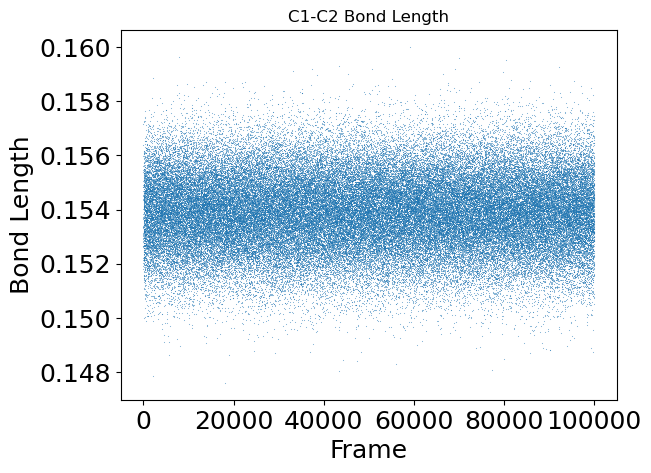

In [21]:
#Compute Some Distances and plot the time course
bond_indices = [0, 4] 
C1C2bondlength = md.compute_distances(traj, [bond_indices])
#plt.plot(C1C2bondlength,linewidth=0.1)
plt.plot(C1C2bondlength,linewidth=0,marker='x',markersize=.1)
plt.xlabel('Frame', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('Bond Length', size=18)
plt.title('C1-C2 Bond Length')
plt.show()

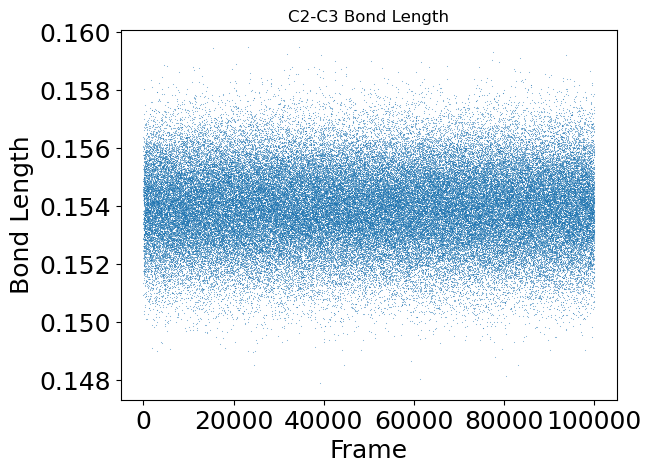

In [22]:
bond_indices = [4, 7] 
C2C3bondlength = md.compute_distances(traj, [bond_indices])
#plt.plot(C2C3bondlength)
plt.plot(C2C3bondlength,linewidth=0,marker='x',markersize=.1)
plt.xlabel('Frame', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('Bond Length', size=18)
plt.title('C2-C3 Bond Length')
plt.show()

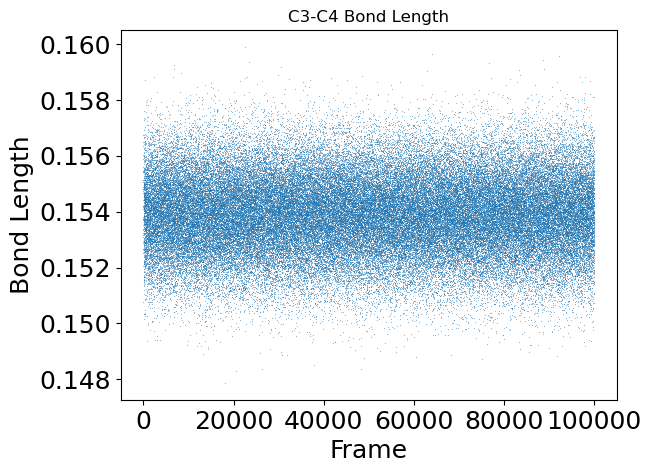

In [23]:
bond_indices = [7, 10] 
C3C4bondlength = md.compute_distances(traj, [bond_indices])
#plt.plot(C3C4bondlength)
plt.plot(C3C4bondlength,linewidth=0,marker='x',markersize=.1)
plt.xlabel('Frame', size=18)
plt.xticks(size=18)
plt.yticks(size=18)
plt.ylabel('Bond Length', size=18)
plt.title('C3-C4 Bond Length')
plt.show()

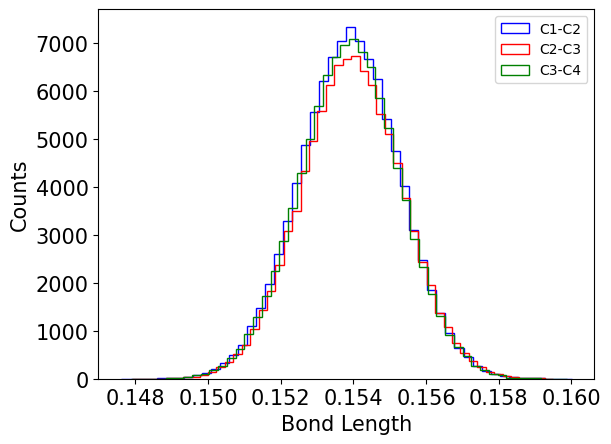

In [24]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
plt.hist(C1C2bondlength,label='C1-C2',color='b',histtype='step',bins=50)
plt.hist(C2C3bondlength,label='C2-C3',color='r',histtype='step',bins=50)
plt.hist(C3C4bondlength,label='C3-C4',color='g',histtype='step',bins=50)
plt.legend(loc='upper right')
plt.xlabel('Bond Length', size=15)
plt.xticks(size=15)
plt.ylabel('Counts', size=15)
plt.yticks(size=15)
plt.show()

Lets Write Functions to Calculate the Variance ($\sigma^2$) and Standard Deviation ($\sigma$)

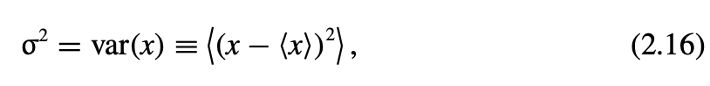

In [25]:
######Class Activtiy: Calculate the Variance and Standard Deviation of Each Bond Length######


In [26]:
###SOLUTION###
def variance(data):
    ave=np.average(data)
    var= np.average((data-ave)**2)
    std=var**0.5
    return var,std

C1C2var,C1C2std=variance(C1C2bondlength)
C2C3var,C2C3std=variance(C2C3bondlength)
C3C4var,C3C4std=variance(C3C4bondlength)

print("C1-C2 variance:",C1C2var,"C1-C2 standard deviation:",C1C2std)
print("C2-C3 variance:",C2C3var,"C1-C2 standard deviation:",C2C3std)
print("C3-C4 variance:",C2C3var,"C1-C2 standard deviation:",C3C4std)

C1-C2 variance: 1.8934988e-06 C1-C2 standard deviation: 0.001376044638626924
C2-C3 variance: 1.9041888e-06 C1-C2 standard deviation: 0.0013799234836920724
C3-C4 variance: 1.9041888e-06 C1-C2 standard deviation: 0.0013687051425428731


In [27]:
#Lets Check Our Answers with the Built In Numpy Libraries
print("C1-C2 average:",np.average(C1C2bondlength),"variance:",np.var(C1C2bondlength),"std-dev:",np.std(C1C2bondlength))
print("C2-C3 average:",np.average(C2C3bondlength),"variance:",np.var(C2C3bondlength),"std-dev:",np.std(C2C3bondlength))
print("C3-C4 average:",np.average(C3C4bondlength),"variance:",np.var(C3C4bondlength),"std-dev:",np.std(C3C4bondlength))

C1-C2 average: 0.15390033 variance: 1.8934988e-06 std-dev: 0.0013760446
C2-C3 average: 0.1539518 variance: 1.9041888e-06 std-dev: 0.0013799234
C3-C4 average: 0.15389948 variance: 1.8733538e-06 std-dev: 0.0013687052


***Class Activity: Lets Check if These Bond Lengths Are Correlated and Calculate the Coerrleation Coefficents***

***First Calculate a Best Fit Line****

We can do this using the np.polyfit function:

https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

***Now Calculate the Perason Correlation Coefficient***
We can use numpy to calculate the correlation coeffient 

https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html

This function works for n-arrays, so it will report correlation coefficient matrix, and we need to select our coefficient of interest, which in our case is the off diagnol  


Line Parameters: [0.50014529 0.0769756 ]


/Users/NLoui/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


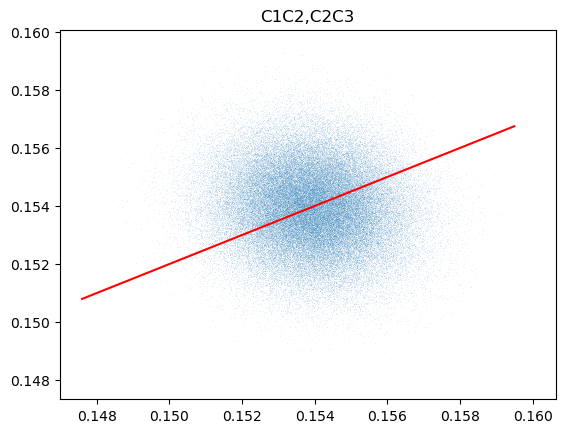

r2: -0.09710688009562769
Line Parameters: [0.49997744 0.07694977]


/Users/NLoui/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


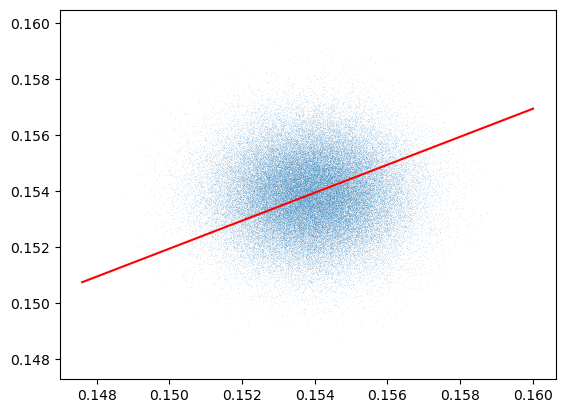

r2: 0.009971071201593363


In [28]:
#####Are these bond lengths correlated?##### 
###Calculate and plot a best fit line, and calculate the correlation coefficient####

plt.scatter(C1C2bondlength,C2C3bondlength,marker='x',s=0.1,linewidth=0.05)

#######SOLUTION###########
plt.title('C1C2,C2C3')

line_fit=np.polyfit(C1C2bondlength[:,0],C2C3bondlength[:,0],1)
x = np.linspace(min(C1C2bondlength[:,0]), max(C2C3bondlength[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()
plt.clf()

r=np.corrcoef(C1C2bondlength[:,0], C2C3bondlength[:,0])
print("r2:",r[0,1])

plt.scatter(C1C2bondlength,C3C4bondlength,marker='x',s=0.1,linewidth=0.05)

line_fit=np.polyfit(C1C2bondlength[:,0],C3C4bondlength[:,0],1)
x = np.linspace(min(C1C2bondlength[:,0]), max(C1C2bondlength[:,0]),20)
y = line_fit[0]*x+line_fit[1]
print("Line Parameters:",line_fit)
plt.plot(x,y,c='r',label='best fit line')
plt.show()

r=np.corrcoef(C1C2bondlength[:,0], C3C4bondlength[:,0])
print("r2:",r[0,1])

**WEEK 1 Homework Question:  Why does one pair of these bonds appear slightly more correlated than the other?**

The pearson correlation coefficient defines the link between the r^2 values and correlation. If r is close to 1 or -1, it has a strong correlation. If r is close to 0, there is no or minimal linear correlation.

Based on the r^2 values, the bonds C1C2 and C2C3 are more correlated. This makes sense as the bonds are attached to the same carbon and the bond length would be affected if the other is affected.

***Class Activity*** 

***Lets write a function to calculate the histogram, return the density and centers
and fit a guassian to each of these distributions?***

Lets Turn these histograms into a probability densities and then fit them to a
normal (Gaussian) Distribution

https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

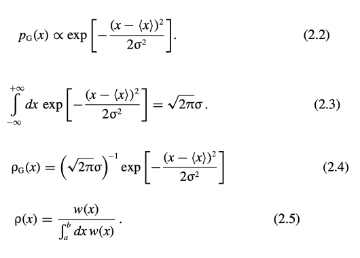
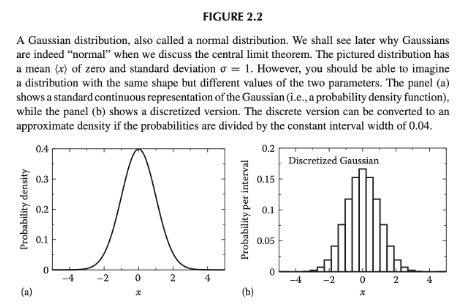

[    1     4    18    72   327  1085  2936  6421 11418 16081 18801 17174
 12756  7473  3551  1358   394   108    18     3] [0.147   0.14765 0.1483  0.14895 0.1496  0.15025 0.1509  0.15155 0.1522
 0.15285 0.1535  0.15415 0.1548  0.15545 0.1561  0.15675 0.1574  0.15805
 0.1587  0.15935 0.16   ]
a: 0.18700713540699135 x_0: 0.15390593086011672 fit_sigma: -0.0013859425358025321


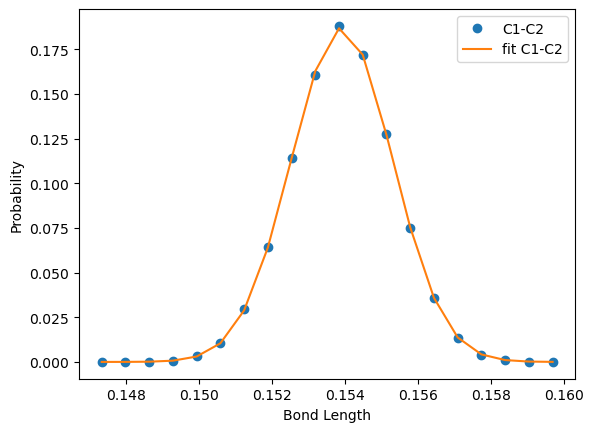

In [29]:
#Lets calculate a Probability Density and fit a gaussian to these
#First lets pull out the data in a formate we can fit
#https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

from scipy.optimize import curve_fit

#First we convert our histogram into bin centers and probabilities
#instead of bin edges and counts:
counts, edges = np.histogram(C1C2bondlength,bins=20,range=[0.147,0.160])
print(counts,edges)
centers = edges[:-1] + np.diff(edges)/2
density=counts/(np.sum(counts))

### THIS IS WHAT YOU WANT TO TURN INTO A FUNCTION FOR  ####


###Now we define a gaussian function that we'll fit to our probability densities
def gauss(x,a, x0, sigma):
    return(a*np.exp(-(x-x0)**2/(2*sigma**2)))

#### Now we define a function to fit the gaussian with curve fit
def fit_gauss(x,y):
    parameters, covariance = curve_fit(gauss,x,y)
    fit_a = parameters[0]
    fit_x0 = parameters[1]
    fit_sigma = parameters[2]
    print("a:",fit_a,"x_0:",fit_x0,"fit_sigma:",fit_sigma)
    fit_y = gauss(x,fit_a,fit_x0,fit_sigma)
    return fit_y,[fit_a,fit_x0,fit_sigma]


C1C2_fit,C1C2_fit_params=fit_gauss(centers,density)

plt.plot(centers,density,'o',label='C1-C2')
plt.plot(centers,C1C2_fit,'-',label='fit C1-C2')
plt.legend()
plt.xlabel('Bond Length')
plt.ylabel('Probability')
plt.show()

#C1C2_density,centers=histogram_bincenters(C1C2bondlength,0.147,0.160,20)

***Homework Porblem 1:  Can you write a function to calculate the histogram, return the density and centers
and fit a guassian to each of these distributions?***

a: 0.18700706213016133 x_0: 0.07711546591417474 fit_sigma: -0.0006929711857036191
a: 0.18616782057009323 x_0: 0.07713933118807823 fit_sigma: 0.0006964654009622212
a: 0.18824630442526277 x_0: 0.07711495153314507 fit_sigma: 0.0006877495901784256


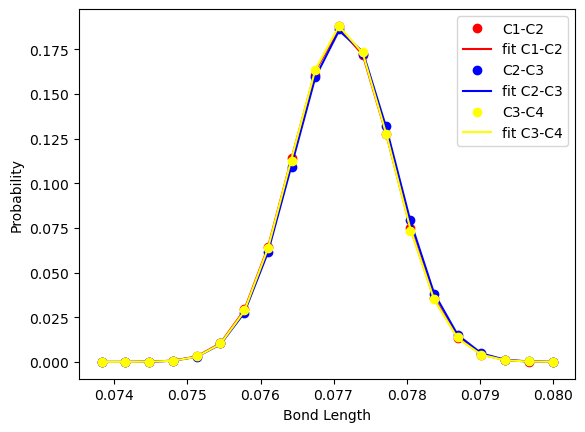

In [30]:
#Can you write a function to calculate the histogram, return the density and centers,
#and then fit a guassian to each of these distributions? 

####HOMEWORK SOLUTION####

#Can you write a function to calculate the histogram, return the density and centers,
#and then fit a guassian to each of these distributions? 

####HOMEWORK SOLUTION####
#function histogram to probability densities aka density
def pdf(data, bins, range):
    counts, edges = np.histogram(data, bins=bins, range=range)
    #data are the bondlengths?
    centers = (edges[:-1] + np.diff(edges)) / 2
    #bin_width = edges[1] - edges[0]
    density = counts / (np.sum(counts))
    return centers, density

#C1C2density_centers[0] = centers, C1C2density_centers[1] = density

#C1C2 bond centers and density
C1C2_pdf=pdf(C1C2bondlength,bins=20,range=[0.147,0.160])


C1C2_fit,C1C2_fit_params=fit_gauss(C1C2_pdf[0],C1C2_pdf[1])
plt.plot(C1C2_pdf[0],C1C2_pdf[1],'o',label='C1-C2',color='red')
plt.plot(C1C2_pdf[0],C1C2_fit,'-',label='fit C1-C2',color='red')

#C2C3 bond centers and density
C2C3_pdf=pdf(C2C3bondlength,bins=20,range=[0.147,0.160])
#print(C2C3density_centers)

C2C3_fit,C2C3_fit_params=fit_gauss(C2C3_pdf[0],C2C3_pdf[1])

plt.plot(C2C3_pdf[0],C2C3_pdf[1],'o',label='C2-C3',color='blue')
plt.plot(C2C3_pdf[0],C2C3_fit,'-',label='fit C2-C3',color='blue')

#C2C3 bond centers and density
C3C4_pdf=pdf(C3C4bondlength,bins=20,range=[0.147,0.160])

C3C4_fit,C3C4_fit_params=fit_gauss(C3C4_pdf[0],C3C4_pdf[1])

plt.plot(C3C4_pdf[0],C3C4_pdf[1],'o',label='C3-C4',color='yellow')
plt.plot(C3C4_pdf[0],C3C4_fit,'-',label='fit C3-C4',color='yellow')

plt.legend()
plt.xlabel('Bond Length')
plt.ylabel('Probability')
plt.show()


**Week 1 Homework Problem #2: convert these probability distributions to culmulative distribution functions**

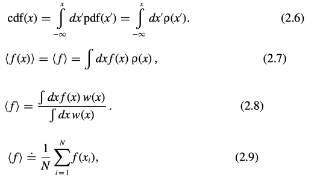

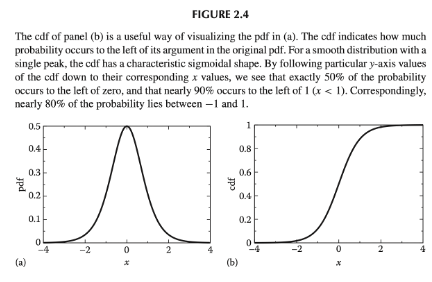

In [31]:
###WEEK 1 HOMEWORK#### 

####HOMEWORK SOLUTION####

####HOMEWORK SOLUTION####
def pdf_to_cdf(density):
    cdf = np.cumsum(density)
    return cdf


a: 0.18700706213016133 x_0: 0.07711546591417474 fit_sigma: -0.0006929711857036191
a: 0.18616782057009323 x_0: 0.07713933118807823 fit_sigma: 0.0006964654009622212
a: 0.18824630442526277 x_0: 0.07711495153314507 fit_sigma: 0.0006877495901784256


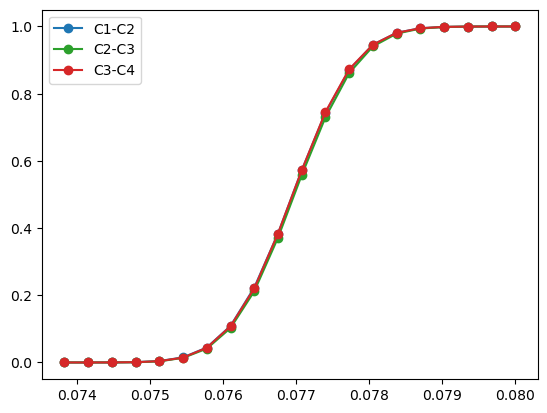

In [32]:
bondlength_list = [C1C2bondlength, C2C3bondlength, C3C4bondlength]
labels = ["C1-C2", "C2-C3", "C3-C4"]
colors = ["tab:blue", "tab:green", "tab:red"]

for n,bondlength in enumerate(bondlength_list): 
    centers, density = pdf(bondlength, 20, [0.147,0.160])
    
    # fit the gaussian 
    fit, fit_params = fit_gauss(centers, density)
    
    # plot the cdf density for each bondlength
    plot_label = labels[n]
    plt.plot(centers, pdf_to_cdf(density), "o", linestyle="-", label=plot_label, color = colors[n])

plt.legend()


**WEEK 1 Homework Problem #3: Lets draw some random frames from our trajectory (for example 10,100,1000,10000),  calculate the probability distribution functions for 4 of these random samples, and fit  gaussians to these probability distirbution functions for 1) A Bond Angle 3) A Dihedral Angle ***
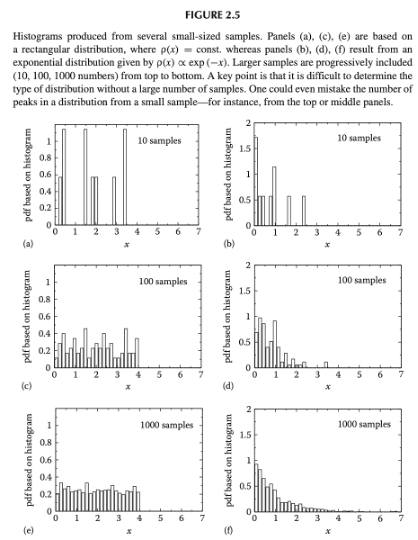

(array([1., 0., 0., 0., 0., 1., 0., 0., 1., 2., 0., 0., 0., 1., 1., 0., 1.,
        0., 0., 2.]),
 array([0.15066065, 0.1508856 , 0.15111053, 0.15133548, 0.15156043,
        0.15178536, 0.15201031, 0.15223525, 0.15246019, 0.15268514,
        0.15291008, 0.15313502, 0.15335996, 0.1535849 , 0.15380985,
        0.15403479, 0.15425973, 0.15448467, 0.15470962, 0.15493456,
        0.1551595 ]),
 [<matplotlib.patches.Polygon at 0x14ed8b190>])

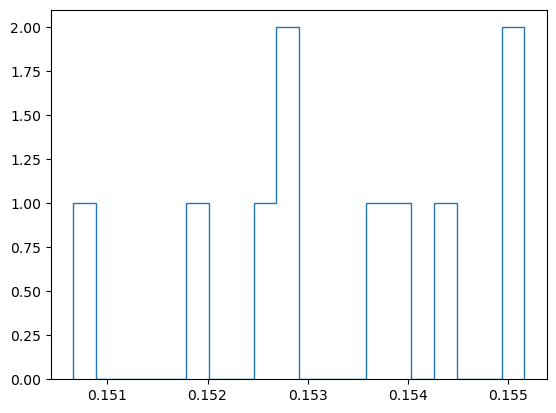

In [33]:
#ADD CODE FOR FITTING GUASSIAN FUNCTIONS TO RANDOM SAMPLES  HERE#
#Draw 10,100,1000 random samples of a bond angle - FIT THEM TO BOND ANGLE

#This function might be helpful:
rands=np.random.randint(10000, size=(10))
rands
C1C2bond=C1C2bondlength[:,0]
C1C2bond[rands]
plt.hist(C1C2bond[rands],bins=20,histtype='step')
#Draw 10,100,1000,10000 random samples of a dihedral angle - FIT THEM TO A GAUSSIAN - WHY IS THIS FIT SO POOR?

In [91]:
atoms, bonds = traj.topology.to_dataframe()
atoms

serial name element  resSeq resName  chainID segmentID
0        1   C1       C       1     NBU        0          
1        2  H11       H       1     NBU        0          
2        3  H12       H       1     NBU        0          
3        4  H13       H       1     NBU        0          
4        5   C2       C       1     NBU        0          
5        6  H21       H       1     NBU        0          
6        7  H22       H       1     NBU        0          
7        8   C3       C       1     NBU        0          
8        9  H31       H       1     NBU        0          
9       10  H32       H       1     NBU        0          
10      11   C4       C       1     NBU        0          
11      12  H41       H       1     NBU        0          
12      13  H42       H       1     NBU        0          
13      14  H43       H       1     NBU        0

**Class Activity: Lets Compute the 2 C-C-C Bond Anlges and C-C-C-C Dihedral Angle ***

Plot their time course and their histograms.  Find a nice way to visualize the C-C-C-C dihedral angle 

(100000, 2)
[[1.958706  1.9390872]
 [1.9375472 2.004483 ]
 [2.036522  1.9765438]
 ...
 [1.9935125 1.976949 ]
 [2.006688  1.9633352]
 [2.0969925 1.9264771]]


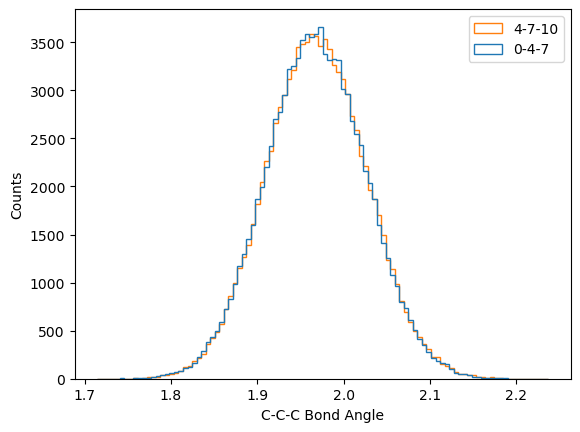

[[ 2.8406749]
 [ 3.1350255]
 [-2.8088021]
 ...
 [-3.1057754]
 [-2.8168669]
 [ 2.6300673]]
[[ 162.75867]
 [ 179.62372]
 [-160.9325 ]
 ...
 [-177.94781]
 [-161.39458]
 [ 150.69176]]


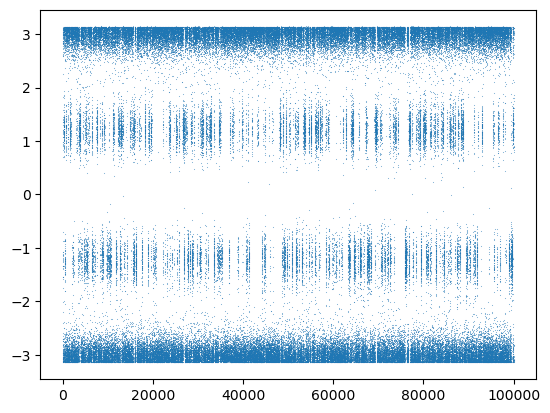

In [34]:
###Class Room Solution###
##Lets Compute Some Bond Angles & Torsions##
Angle1=[0,4,7]
Angle2=[4,7,10]

ang = md.compute_angles(traj,[Angle1,Angle2])
print(np.shape(ang))
print(ang)

ang1=ang[:,0]
ang2=ang[:,1]

plt.plot(ang1,linewidth=0,marker='x',markersize=.1)
plt.plot(ang2,linewidth=0,marker='x',markersize=.1)
plt.clf()

plt.hist(ang,bins=100,histtype='step',label=['0-4-7','4-7-10'])
plt.legend()
plt.xlabel('C-C-C Bond Angle')
plt.ylabel('Counts')
plt.show()
#plt.scatter(ang1,marker='o',s=0.1)

CCCC_index=[10,7,4,0]
CCCC_torsion=md.compute_dihedrals(traj, [CCCC_index])
print(CCCC_torsion)
print(np.rad2deg(CCCC_torsion))

plt.plot(CCCC_torsion,marker='x',markersize=.1,linewidth=0)
#plt.xlim([0,100])

***Homework Problem #3: Lets draw some random frames from our trajectory(for example 10,100,1000,10000), calculate the probability distribution functions for 4 of these random samples, and fit gaussians to these probability distirbution functions for 1) A Bond Angle 3) A Dihedral Angle. 
Why is the Gaussian fit for a dihedral so poor with a large sample?***

In [35]:
###Solution###
#To redefine gauss function
def fit_gauss(x,y):
    # Compute initial parameter guesses
    init_guess_a = max(y)  # Initial guess for the peak height
    init_guess_x0 = np.mean(x)  # Initial guess for the peak position
    init_guess_sigma = np.std(x)  # Initial guess for the standard deviation

    # Define initial guesses
    initial_guess = (init_guess_a, init_guess_x0, init_guess_sigma)
    # Initial_guess to curve_fit function
    parameters, covariance = curve_fit(gauss, x, y, p0=initial_guess)
    
    fit_a = parameters[0]
    fit_x0 = parameters[1]
    fit_sigma = parameters[2]
    print("a:", fit_a, "x_0:", fit_x0, "fit_sigma:", fit_sigma)

    fit_y = gauss(x, fit_a,fit_x0, fit_sigma)

    return fit_y, [fit_a,fit_x0, fit_sigma]

a: 0.27685548333922666 x_0: 0.9739123918397663 fit_sigma: 0.016695628409492198
a: 0.19935793998146004 x_0: 0.9899192619447932 fit_sigma: 0.02605763438103542
a: 0.18239257413898333 x_0: 0.9909113818624282 fit_sigma: 0.02950996559876164
a: 0.1845979307618227 x_0: 0.9903850520745334 fit_sigma: 0.029183732336866528


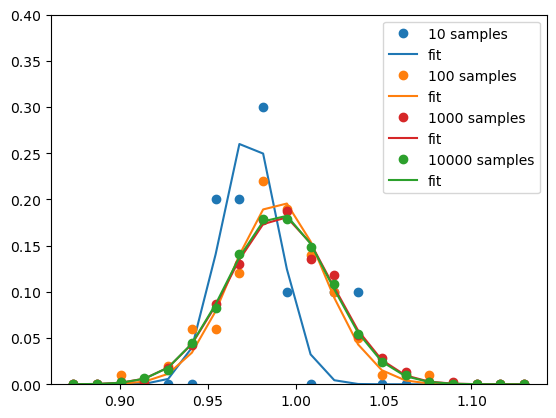

In [36]:
#Ang1
sizes = [10, 100, 1000, 10000]
colors = ["tab:blue", "tab:orange", "tab:red", "tab:green"]
labels = [["10 samples","fit"], ["100 samples","fit"], ["1000 samples","fit"], ["10000 samples","fit"]]


#trying this damn function
for n,s in enumerate(sizes): 
    rands=np.random.randint(100000, size=s)
    centers, density = pdf(ang1[rands], 20, [1.72,2.26]) 
    fit, fit_params = fit_gauss(centers, density)

     
    plt.plot(centers, density, "o", label= labels[n][0], color=colors[n])
    plt.plot(centers, fit, linestyle="-", label=labels[n][1], color=colors[n])
    

plt.ylim(0,0.40)
plt.legend()

I'm not sure why the x range is 0.9 to 1.2?

a: 0.15769630854687752 x_0: 0.9891056031536104 fit_sigma: 0.03672556006141831
a: 0.19085498912282972 x_0: 0.9914361586893284 fit_sigma: 0.028263819055750802
a: 0.1920126137908894 x_0: 0.9901178883916361 fit_sigma: 0.027819821914399162
a: 0.1826810233199671 x_0: 0.9907530539268378 fit_sigma: 0.029556025894841808


(0.0, 0.4)

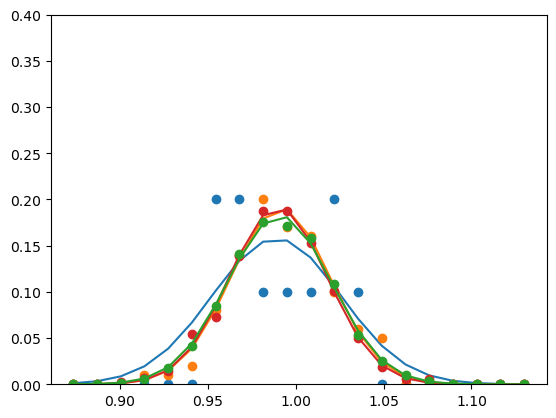

In [38]:
#For Ang2
for n,s in enumerate(sizes): 
    rands=np.random.randint(100000, size=s)
    centers, density = pdf(ang2[rands], 20, [1.72,2.26]) 
    fit, fit_params = fit_gauss(centers, density)

     
    plt.plot(centers, density, "o", label= labels[n][0], color=colors[n])
    plt.plot(centers, fit, linestyle="-", label=labels[n][1], color=colors[n])
    


plt.ylim(0,0.40)


a: 0.4626516191279867 x_0: 1.5337864748406198 fit_sigma: -0.06859967994144042
a: 0.43575464998634383 x_0: 1.6280581561690777 fit_sigma: -0.09265217395704407
a: 0.4000223817723982 x_0: 1.6361016528542975 fit_sigma: -0.11665401193204189
a: 0.9141089542561112 x_0: -1.669777578338152 fit_sigma: -0.1788221796700997


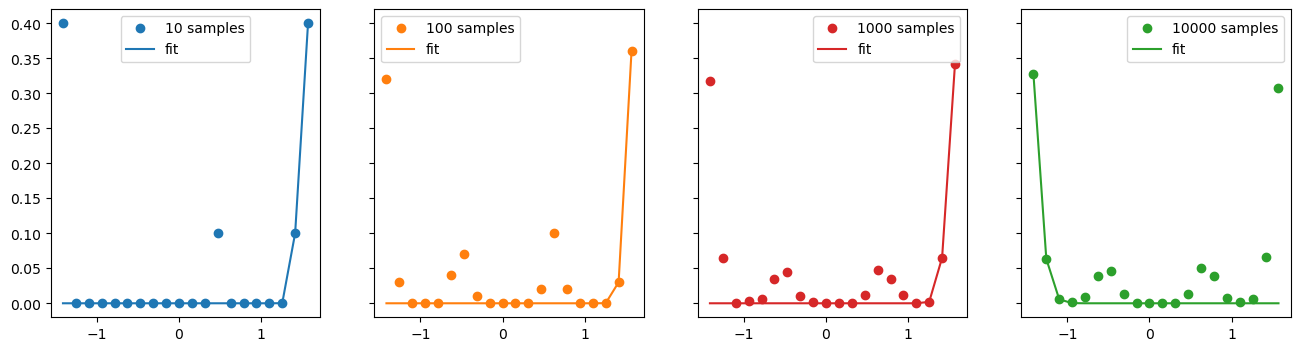

In [45]:
#For dihedral angles
fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharey=True)

for n,s in enumerate(sizes): 
    rands=np.random.randint(100000, size=s)
    centers, density = pdf(CCCC_torsion[:,0][rands], 20, [np.min(CCCC_torsion), np.max(CCCC_torsion)]) 
    fit, fit_params = fit_gauss(centers, density)

     # plot 
    axs[n].plot(centers, density, "o", label= labels[n][0], color=colors[n])
    axs[n].plot(centers, fit, linestyle="-", label=labels[n][1], color=colors[n])
    axs[n].legend()

Why is the Gaussian fit for a dihedral so poor with a large sample?

The gaussian fit doesn't have a clear pattern between 10, 100, or 10000 samples. As the dihedral doesn't follow a gaussian trend, it seems to imply that the dihedral has at least two distinct fits. If the fit  took the absolute value of a dihedral instead it may look gaussian. 

***Week 1 Homework Question:  What is the probability of being found in the higher free energy C-C-C-C dihedral state?*****

In [43]:
####Week 1 Homework Question: What is the probability of being found in the higher free energy C-C-C-C dihedral state?####

#### Calculate Here #####
#### THis will require the use of np.where() 
###https://numpy.org/doc/stable/reference/generated/numpy.where.html
CCCC_dihe=CCCC_torsion[:,0]
a=np.where(CCCC_dihe<0)
print(a)
CCCC_dihe[a]
b=np.where(CCCC_dihe>-2)
print(b)
CCCC_dihe[b]
c=np.where((CCCC_dihe<0) & (CCCC_dihe>-2))
print(c)
CCCC_dihe[c]


(array([    2,     4,     7, ..., 99995, 99997, 99998]),)
(array([    0,     1,     3, ..., 99992, 99996, 99999]),)
(array([  114,   115,   116, ..., 99851, 99852, 99853]),)


array([-1.7420202, -1.0811301, -1.1586044, ..., -1.3297478, -1.2036906,
       -1.9702399], dtype=float32)

In [44]:
#CCCC_dihe[c] is the higher free energy states
higher_energy_occ=len(CCCC_dihe[c])
total_occ=len(CCCC_dihe)

prob=higher_energy_occ/total_occ
print("Probability of being in the higher free energy state:", prob)

# the probability of being found in a high energy state
high_energy_state =np.where((CCCC_dihe<0.1) & (CCCC_dihe>-0.1))[0]
print("The probability of high energy state of synperiplanar is: ", len(high_energy_state)/len(CCCC_dihe))

# the probability of being found in a high energy state
eclipsed_energy_state =np.concatenate((np.where((CCCC_dihe<1.05) & (CCCC_dihe>1.04))[0], np.where((CCCC_dihe<-1.04) & (CCCC_dihe>-1.05))[0]))
print("The probability of energy state of eclipsed (+/-) is: ", len(eclipsed_energy_state)/len(CCCC_dihe))


Probability of being in the higher free energy state: 0.10705
The probability of high energy state of synperiplanar is:  4e-05
The probability of energy state of eclipsed (+/-) is:  0.00274


**Class Activity: Are The Bond Angles and Dihedral Angle Correlated?**

r2: 0.00031327195708297315


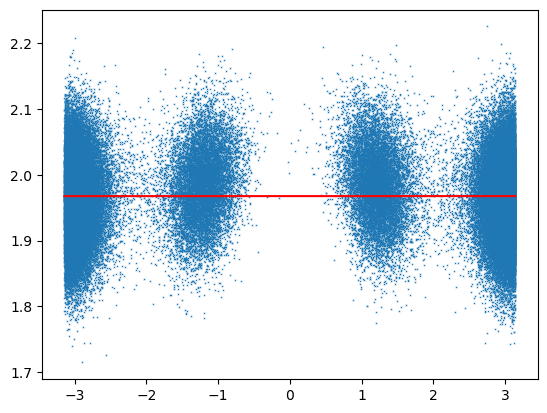

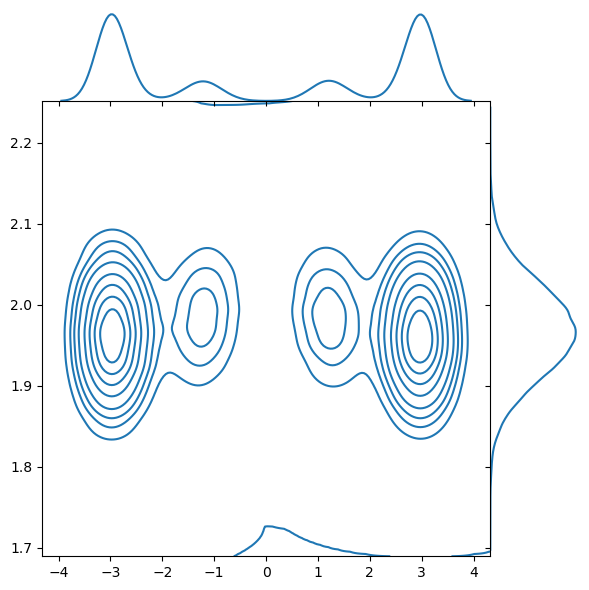

In [46]:
#### COMPLETE IN-CLASS ACTIVITY HERE #####
#Are the bond angle and dihedral correlated?
CCCC_dihe

plt.scatter(CCCC_dihe,ang1,marker='x',s=0.1)
r=np.corrcoef(CCCC_dihe,ang1)
print("r2:",r[0,1])
line_fit=np.polyfit(CCCC_dihe,ang1,1)
line_fit
x=np.linspace(min(CCCC_dihe),max(CCCC_dihe),20)
y = line_fit[1]+x*line_fit[0]
plt.plot(x,y,c='r',label='best fit line')
plt.show()
##### ADD FANCY SEABORN PLOT HERE ######
sns.jointplot(x=CCCC_dihe,y=ang1,kind='kde',space=0,thresh=0)

**Homework Problem 3: Can you express the relationsip between these two quantites using histograms and conditional probabilities ?** 

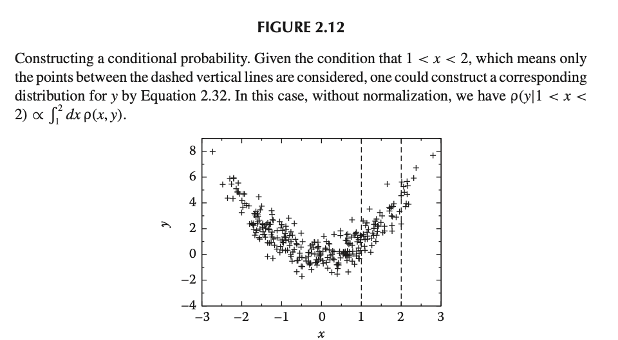

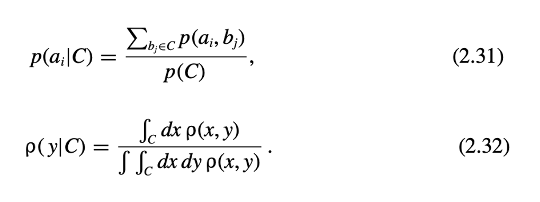

In [47]:
#Homework problem 3 Solution ##

#### THis will require the use of np.where() 
###https://numpy.org/doc/stable/reference/generated/numpy.where.html
CCCC_dihe
a=np.where(CCCC_dihe<0)
print(a)
CCCC_dihe[a]
b=np.where(CCCC_dihe>-2)
print(b)
CCCC_dihe[b]
c=np.where((CCCC_dihe<0) & (CCCC_dihe>-2))
print(c)
CCCC_dihe[c]

(array([    2,     4,     7, ..., 99995, 99997, 99998]),)
(array([    0,     1,     3, ..., 99992, 99996, 99999]),)
(array([  114,   115,   116, ..., 99851, 99852, 99853]),)


array([-1.7420202, -1.0811301, -1.1586044, ..., -1.3297478, -1.2036906,
       -1.9702399], dtype=float32)

In [48]:
#Will Walk through example of Autocorrelation Function (ACF) calculation here#
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else numpy.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return numpy.array(corr)
    
print(ang1)
print(ang1[1:])
print(ang1[:-1])

[1.958706  1.9375472 2.036522  ... 1.9935125 2.006688  2.0969925]
[1.9375472 2.036522  1.9977696 ... 1.9935125 2.006688  2.0969925]
[1.958706  1.9375472 2.036522  ... 2.027672  1.9935125 2.006688 ]


**Class Activity: Lets Calculate the Autocorrelation Times of C-C Bonds, C-C-C Angles, and C-C-C-C Dihedrals**

https://ipython-books.github.io/103-computing-the-autocorrelation-of-a-time-series/

[0.00000e+00 2.00002e-01 4.00004e-01 ... 1.99996e+04 1.99998e+04
 2.00000e+04]


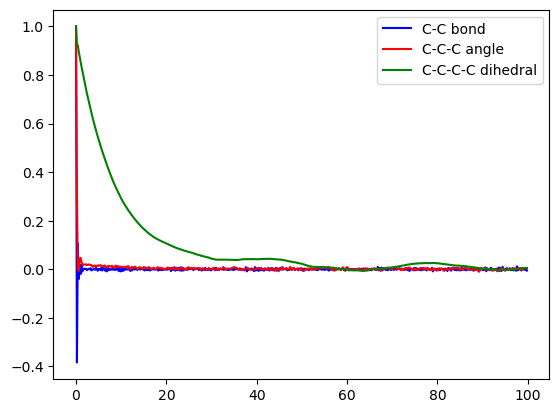

In [50]:
#Lets Calculate the autocorrelation times for bond lengths, bond angles, and torsions:
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else numpy.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return numpy.array(corr)

#time in picoseconds
time=np.linspace(0,20000,traj.n_frames)
print(time)

lags=range(500)
#C1C2bondlength[:,0]
bond_autocor=autocorr1(C1C2bondlength[:,0],lags)
ang_autocor=autocorr1(ang1,lags)
dihe_autocor=autocorr1(np.cos(CCCC_torsion[:,0]),lags)
plt.plot(time[lags],bond_autocor,color='b',label='C-C bond')
plt.plot(time[lags],ang_autocor,color='r',label='C-C-C angle')
plt.plot(time[lags],dihe_autocor,color='g',label='C-C-C-C dihedral')
plt.legend()

**Class Activity: Lets Dig Into force field XML file and make plots of the force field torsion terms**

Documentation of Torsion Term Conventions:

https://ambermd.org/doc12/Amber21.pdf#page=264

http://docs.openmm.org/latest/userguide/application/05_creating_ffs.html#basic-concepts

From Butane.gaff2.xml

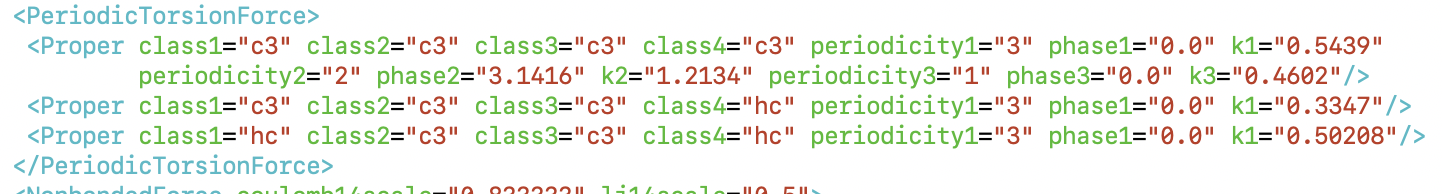

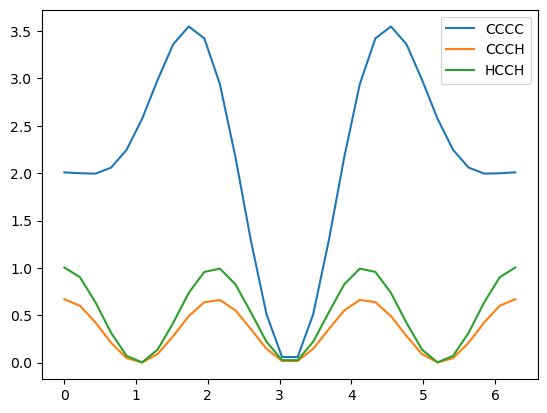

In [51]:
#Plot The Torsion Force Field Terms

#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets write a function to plot the values of force field terms
#Plot The Torsion Force Field Terms

#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets write a function to plot the values of force field terms

def calc_torsion_energy(angle,k1,period,phase):
     e=k1*(1+np.cos(period*angle-phase))
     return e

def CCCC_torsionE(angle):
 e1=calc_torsion_energy(angle,0.4602,1,0)
 e2=calc_torsion_energy(angle,1.2134,2,3.1416)
 e3=calc_torsion_energy(angle,0.5439,3,0)
 return e1+e2+e3

def CCCH_torsionE(angle):
 e1=calc_torsion_energy(angle,0.3347,3,0)
 return e1

def HCCH_torsionE(angle):
 e1=calc_torsion_energy(angle,0.50208,3,0)
 return e1

CCCC_e=CCCC_torsionE(rad_ang)
CCCH_e=CCCH_torsionE(rad_ang)
HCCH_e=HCCH_torsionE(rad_ang)


plt.plot(rad_ang,CCCC_e, label="CCCC")
plt.plot(rad_ang,CCCH_e, label="CCCH")
plt.plot(rad_ang,HCCH_e, label="HCCH")
plt.legend()

In [46]:
##Lets Review all our atoms as we attempt to tabulate all the relevant torsion terms
atoms, bonds = traj.topology.to_dataframe()
atoms

serial name element  resSeq resName  chainID segmentID
0        1   C1       C       1     NBU        0          
1        2  H11       H       1     NBU        0          
2        3  H12       H       1     NBU        0          
3        4  H13       H       1     NBU        0          
4        5   C2       C       1     NBU        0          
5        6  H21       H       1     NBU        0          
6        7  H22       H       1     NBU        0          
7        8   C3       C       1     NBU        0          
8        9  H31       H       1     NBU        0          
9       10  H32       H       1     NBU        0          
10      11   C4       C       1     NBU        0          
11      12  H41       H       1     NBU        0          
12      13  H42       H       1     NBU        0          
13      14  H43       H       1     NBU        0

 <PeriodicTorsionForce>
  <Proper class1="c3" class2="c3" class3="c3" class4="c3" periodicity1="3" phase1="0.0" k1="0.5439" 
          periodicity2="2" phase2="3.1416" k2="1.2134" periodicity3="1" phase3="0.0" k3="0.4602"/>
  <Proper class1="c3" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.3347"/>
  <Proper class1="hc" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.50208"/>

 <PeriodicTorsionForce>
  <Proper class1="c3" class2="c3" class3="c3" class4="c3" periodicity1="3" phase1="0.0" k1="0.5439" 
          periodicity2="2" phase2="3.1416" k2="1.2134" periodicity3="1" phase3="0.0" k3="0.4602"/>
  <Proper class1="c3" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.3347"/>
  <Proper class1="hc" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.50208"/>

In [53]:
#Lets Consider Up All The Torsions Along the Central Carbon
#Atomnames: (H41,H42,H43)-C4-C3(H31,H32)-C2(H21,H22)-C1(H11,H12,H13)
#Atomnumbers: (13,12,11)-10-(8,9)7-4(5,6)-0(1,2,3)

#Lets Tally Up All The Torsions Along the Central Carbon
#Atomnames: (H41,H42,H43)-C4-C3(H31,H32)-C2(H21,H22)-C1(H11,H12,H13)
#Atomnumbers: (13,12,11)-10-(8,9)7-4(5,6)-0(1,2,3)

#Central Torsion: 
#C-C-C-C -[10,7,4,0]
#H-C-C-H; [8,7,4,5],[8,7,4,6],[9,7,4,5],[9,7,4,6]  
#H-C-C-H; [6,4,0,1],[6,4,0,2],[6,4,0,3],[5,4,0,1],[5,4,0,2],[5,4,0,3]
#H-C-C-H; [13,10,7,8],[12,10,7,8],[11,10,7,8],[13,10,7,9],[12,10,7,9],[11,10,7,9]
#C-C-C-H -[10,7,4,1],[10,7,4,2],[10,7,4,2],[4,7,10,13],[4,7,10,12],[4,7,10,13]

CCCC_index=[10,7,4,0]
HCCH_indices=[[8,7,4,5],[8,7,4,6],[9,7,4,5],[9,7,4,6],[6,4,0,1],[6,4,0,2],[6,4,0,3],[5,4,0,1],[5,4,0,2],[5,4,0,3],[13,10,7,8],[12,10,7,8],[11,10,7,8],[13,10,7,9],[12,10,7,9],[11,10,7,9]]
CCCH_indices=[10,7,4,1],[10,7,4,2],[10,7,4,2],[4,7,10,13],[4,7,10,12],[4,7,10,13]

HCCH_torsions=md.compute_dihedrals(traj, HCCH_indices)
CCCH_torsions=md.compute_dihedrals(traj, CCCH_indices)
CCCC_torsion=md.compute_dihedrals(traj, [CCCC_index])


**Homework Problem #5: Many of These Correlations will be highly Correlated Select Some Torsions that are Correlated, and some that are not, and make scatter plots of their relationships**

For a Torsion Angle Pair that is highly correlated, can you find a relatively constant offset?  

For a Torsion Angle Pair that are less correlated, how can you interpret their scatter plots?

In [54]:
print(HCCH_indices)
print(HCCH_torsions)

[[8, 7, 4, 5], [8, 7, 4, 6], [9, 7, 4, 5], [9, 7, 4, 6], [6, 4, 0, 1], [6, 4, 0, 2], [6, 4, 0, 3], [5, 4, 0, 1], [5, 4, 0, 2], [5, 4, 0, 3], [13, 10, 7, 8], [12, 10, 7, 8], [11, 10, 7, 8], [13, 10, 7, 9], [12, 10, 7, 9], [11, 10, 7, 9]]
[[ 2.8285532  -1.4825716   0.8691437  ... -0.7875035   1.393257
  -2.734063  ]
 [ 3.0134099  -1.1152136   0.9610462  ... -1.0767546   1.1391149
  -3.0535393 ]
 [-3.0087023  -0.9436848   1.30945    ... -0.8875946   1.208116
  -2.8175814 ]
 ...
 [ 3.063983   -1.1437353   1.1073357  ... -2.9456592  -0.7839871
   1.1969528 ]
 [-2.8309572  -0.810569    1.5874939  ...  2.9585993  -1.3433874
   0.8599253 ]
 [ 2.8299677  -1.491776    0.63461596 ... -2.996878   -1.0832123
   1.2841738 ]]


(100000, 2)
[[1.8736277 1.9063174]
 [1.9754283 1.9617486]
 [1.9886214 1.9310893]
 ...
 [1.9366957 2.017839 ]
 [1.8842232 1.8156453]
 [1.9546283 1.9058605]]
[[ 2.8285532]
 [ 3.0134099]
 [-3.0087023]
 ...
 [ 3.063983 ]
 [-2.8309572]
 [ 2.8299677]]
[[ 162.06415]
 [ 172.65565]
 [-172.38593]
 ...
 [ 175.55328]
 [-162.20189]
 [ 162.1452 ]]


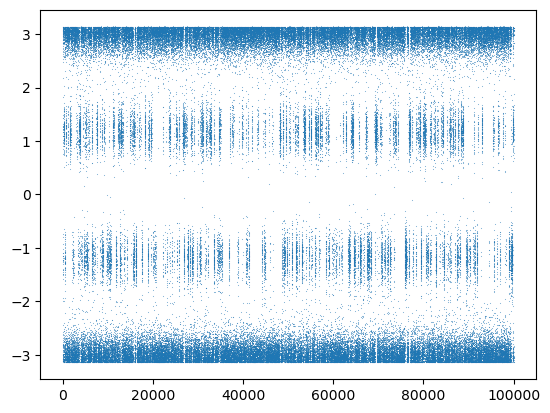

In [55]:
#H-C-C-H; [8,7,4,5]

HCCH_Angle1=[8,7,4]
HCCH_Angle2=[7,4,5]

ang = md.compute_angles(traj,[HCCH_Angle1,HCCH_Angle2])
print(np.shape(ang))
print(ang)

HCCH_ang1=ang[:,0]
HCCH_ang2=ang[:,1]

HCCH_index=[8,7,4,5]
HCCH_torsion=md.compute_dihedrals(traj, [HCCH_index])
print(HCCH_torsion)
print(np.rad2deg(HCCH_torsion))

plt.plot(HCCH_torsion,marker='x',markersize=.1,linewidth=0)
#plt.xlim([0,100])

r2: 0.6351629775679706


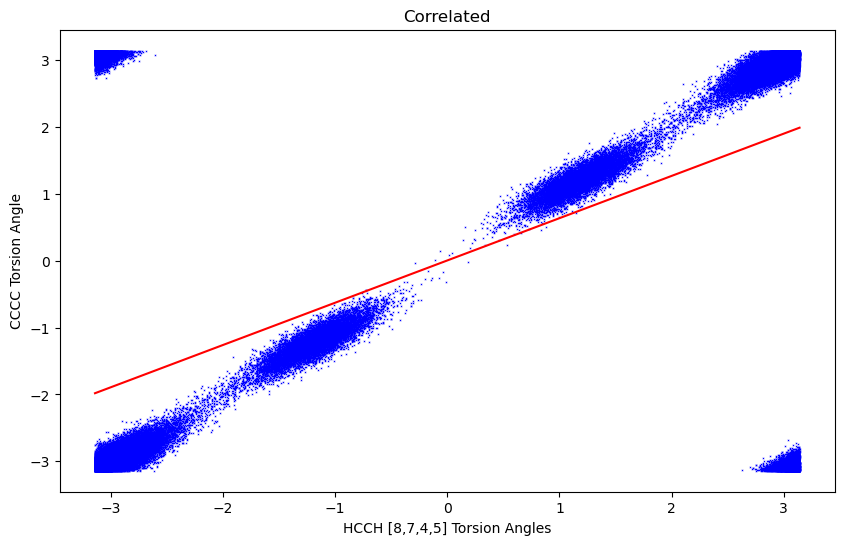

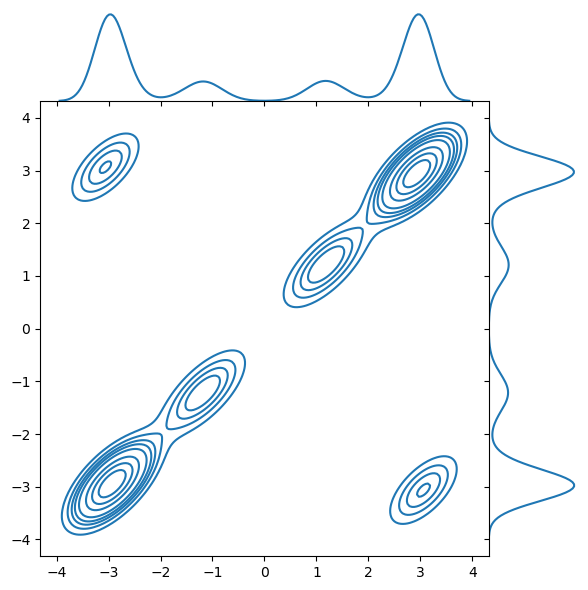

In [56]:
####WEEK 1 Homework Problem 5 - Correlations in torsion paramters###
#PLOT SOME TORSIONS THAT YOU EXPECT TO BE HIGHLY CORRELATED - EXPLAIN WHY - EXPLAIN WHAT OU SEE
#Consider CCCC vs. [8,7,4,5]
#Consider CCCC vs. [8,7,4,5]

# Extract torsional angles
HCCH_tor_8745 = HCCH_torsions[:, HCCH_indices.index([8, 7, 4, 5])]  # Extracting the first torsion angle from HCCH_torsions
CCCC_tor = CCCC_torsion[:, 0]    # Extracting the torsion angle from CCCC_torsion
#HCCH_angles_8746 = HCCH_torsions[:, HCCH_indices.index([8, 7, 4, 6])]


# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(HCCH_tor_8745, CCCC_tor, label='Correlated Torsions', marker='x',s=0.1,color='blue')
#plt.scatter(HCCH_angles_8745, HCCH_angles_8746, label='Correlated Torsions', color='lightblue')
r=np.corrcoef(CCCC_tor,HCCH_tor_8745)
print("r2:",r[0,1])
line_fit=np.polyfit(CCCC_tor,HCCH_tor_8745,1)
line_fit
x=np.linspace(min(CCCC_tor),max(CCCC_tor),20)
y = line_fit[1]+x*line_fit[0]
plt.plot(x,y,c='r',label='best fit line')


# Set labels and title
plt.xlabel('HCCH [8,7,4,5] Torsion Angles')
plt.ylabel('CCCC Torsion Angle')
plt.title('Correlated')

plt.show()


sns.jointplot(x=HCCH_tor_8745,y=CCCC_tor,kind='kde',space=0,thresh=0)


r2: 0.022790858327259182


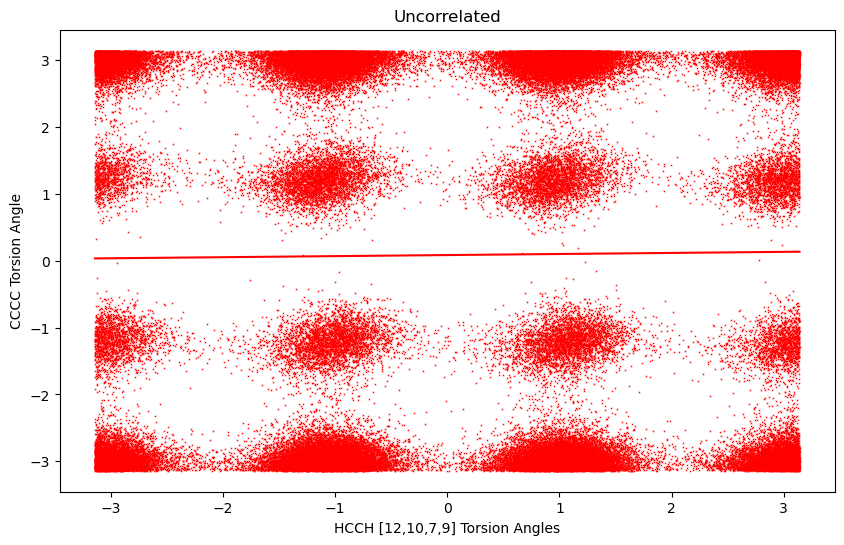

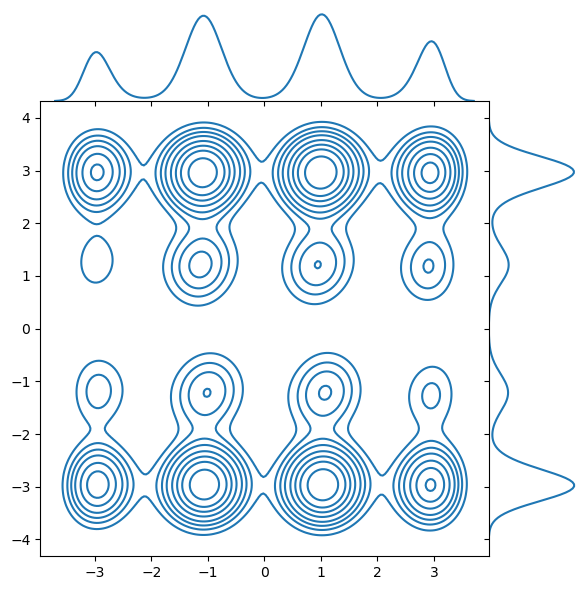

In [57]:
#PLOT SOME TORSIONS THAT YOU EXPECT TO BE UNCORRELATED - Explain what you see
#Consider CCCC vs. [12,10,7,9]

# Extract torsional angles
HCCH_tor_12_10_7_9 = HCCH_torsions[:, HCCH_indices.index([12, 10, 7, 9])]  
CCCC_tor = CCCC_torsion[:, 0]    # Extracting the torsion angle from CCCC_torsion
#HCCH_angles_8746 = HCCH_torsions[:, HCCH_indices.index([8, 7, 4, 6])]


# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(HCCH_tor_12_10_7_9, CCCC_tor, label='UnCorrelated Torsions', marker='x',s=0.1,color='red')
#plt.scatter(HCCH_angles_8745, HCCH_angles_8746, label='Correlated Torsions', color='lightblue')
r=np.corrcoef(CCCC_tor,HCCH_tor_12_10_7_9)
print("r2:",r[0,1])
line_fit=np.polyfit(CCCC_tor,HCCH_tor_12_10_7_9,1)
line_fit
x=np.linspace(min(CCCC_tor),max(CCCC_tor),20)
y = line_fit[1]+x*line_fit[0]
plt.plot(x,y,c='r',label='best fit line')


# Set labels and title
plt.xlabel('HCCH [12,10,7,9] Torsion Angles')
plt.ylabel('CCCC Torsion Angle')
plt.title('Uncorrelated')

plt.show()


sns.jointplot(x=HCCH_tor_12_10_7_9,y=CCCC_tor,kind='kde',space=0,thresh=0)

TBH, i have no idea how these show correlation vs uncorrelation but my best guess is if the fit line aligns with the scatter plot, it will probably have a correlation. Then based on the r^2 answer from before, the better correlated also has a r^2 value that is closer to +/- 1 than to 0. 

**Homework Problem #6: SELECT TWO TORSIONS THAT YOU EXPECT TO HAVE A SYSTEMATIC OFFSET 
CALCULATE THEIR OFFSET IN EACH FRAME - EXPLAIN YOUR RESULT**

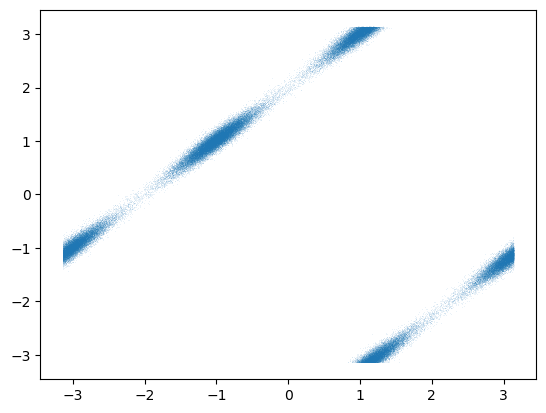

In [58]:
#SELECT TWO TORSIONS THAT YOU EXPECT TO HAVE A SYSTEMATIC OFFSET 
#CALCULATE THEIR OFFSET IN EACH FRAME - EXPLAIN YOUR RESULT
# Comparing two torsions that have a systematic offset 
# [12, 10, 7, 8], [12, 10, 7, 8, 9]

plt.scatter(HCCH_torsions[:,11], HCCH_torsions[:,14],marker='x',s=0.1,linewidth=0.05)
plt.show()

Text(0.5, 0, 'frame')

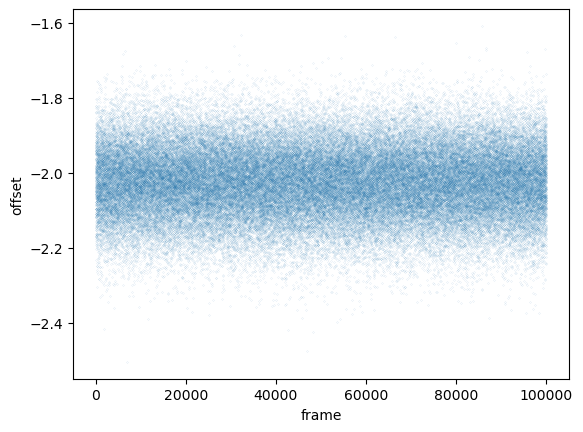

In [59]:
#Calculating systematic offset
offset_diff = HCCH_torsions[:,11]- HCCH_torsions[:,14]
offset_diff = np.where(offset_diff>0, offset_diff - 2*np.pi, offset_diff)

plt.plot(offset_diff, marker=".",markersize=0.1, linestyle="None")
plt.ylabel("offset")
plt.xlabel("frame")

A systematic offset (in this class) refers to a consistent deviation or bias observed in computed values compared to reference or experimental data. By comparing a set that has the same first 3 atoms except for the last different H (CHC-H) with a similar set, we can determine the offset. In experimental/classic chemistry, we would expect the hydrogens to be offset by an average of 109.5°/1.911rad.

In the graph above, we can see the values around -1.9 rad. This implies that between the two chemically 'identical' H's would be flipped at 109.5, as expected in organic chemistry.

In [ ]:
####WEEK 1 STOP HERE######

***WEEK 2 Homework Problem #1: Lets modify the C-C-C-C Torsion Potential to change the dihedral distribution***


Lets try to lower the dihedral barriers for torsion angles of 1 radian (~60 degrees)
This means we need to to come up with a torsion potential, potentially by using multiple terms with different phases, to equalize the free energy of each C-C-C-C torsion basin (increasing the free energy at $\pi$ and lowering 
free energy at $\pi$/3

Once you've come up with torsion terms you're happy with, you'll need to make a copy of the butane.gaff2.xml, add in the additional torsion terms you have come up with, and run a new simulation.  Then plot the C-C-C-C dihedral histogram or PMF, and compare it to the simulation with original force field.

It would be great if you came up with some kind of fitting routine to determine the coefficients of torsions, perhaps by targeting a gaussian, or you can try to arrive at by hand using something like this:

https://www.desmos.com/calculator/ea1qhzjnuf

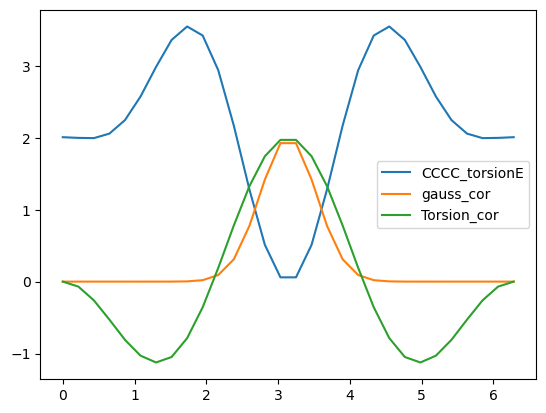

In [67]:
###SOLUTION#####

#from class
#First Lets make a linespace from -pi to pi
rad_ang=np.linspace(0,2*math.pi,30)

##Lets write a function to plot the values of force field terms
def calc_torsion_energy(angle,k1,period,phase):
     e=k1*(1+np.cos(period*angle-phase))
     return e

def CCCC_torsionE(angle):
 e1=calc_torsion_energy(angle,0.4602,1,0)
 e2=calc_torsion_energy(angle,1.2134,2,3.1416)
 e3=calc_torsion_energy(angle,0.5439,3,0)
 return e1+e2+e3

plt.plot(rad_ang,CCCC_e, label='CCCC_torsionE')

# We want to mimic a gaussian potential that adds potential energy 
# when the CCCC dihedral = pi = 180 degrees
# We can think of this as approximating a guassian center at theta= 180
# Now we define a gaussian function 
# that we'll fit to our probability densities

def gauss(x, a, x0, sigma):
    return (a*np.exp(-(x-x0)**2/(2*sigma**2)))

#Here is what we want our dihedral correction to look like:

gauss_cor = gauss(rad_ang, 2, np.pi, np.pi/8)
plt.plot(rad_ang,gauss_cor,label='gauss_cor')

#Here I come up with a correction that should have the desired effect:

def TorsionCorrection(angle):
 e1=calc_torsion_energy(angle,-1,1,0)
 e2=calc_torsion_energy(angle,1,2,0)
 e3=calc_torsion_energy(angle,0.5439,3,0)
 return e1+e2

torsion_cor=TorsionCorrection(rad_ang)

plt.plot(rad_ang,torsion_cor, label='Torsion_cor')
plt.legend()



***WEEK 2 Homework Problem #2 Attempt to run a new MD Simulation with your modified torsion potential***

Once you have made a torsion correction you like make a new force field file 'butane.gaff2.cor1.xml'.

Run a new simulation with this force field and compare the dihedral distributions 

In [70]:
#RUN NEW MD SIMULATION HERE#
workdir='/Users/NLoui/Desktop/Chem101_S24/Exercise1/'
datadir='/Users/NLoui/Desktop/Chem101_S24/Exercise1/data/'
outdir='/Users/Nloui/Desktop/Chem101_S24/Exercise1/outdir/'
PDB_file_name = datadir+'butane.pdb'
forcefield_file_name = datadir+'butane.gaff2.cor1.xml'

print(PDB_file_name)
print(forcefield_file_name)

pdb = mm.app.PDBFile(PDB_file_name)
forcefield = mm.app.ForceField(forcefield_file_name)

system = forcefield.createSystem(pdb.topology, nonbondedMethod=mm.app.NoCutoff, constraints=mm.app.HBonds)
integrator = mm.LangevinIntegrator(298.15*kelvin, 5.0/picosecond, 2.0*femtoseconds)
integrator.setConstraintTolerance(1e-5)
platform = mm.Platform.getPlatformByName('Reference')
simulation = app.Simulation(pdb.topology, system, integrator, platform)
simulation.context.setPositions(pdb.positions)

/Users/NLoui/Desktop/Chem101_S24/Exercise1/data/butane.pdb
/Users/NLoui/Desktop/Chem101_S24/Exercise1/data/butane.gaff2.cor1.xml


In [71]:
print('Minimizing...')

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy before minimization is {st.getPotentialEnergy()}")

simulation.minimizeEnergy(maxIterations=100)

st = simulation.context.getState(getPositions=True,getEnergy=True)
print(F"Potential energy after minimization is {st.getPotentialEnergy()}")

Minimizing...
Potential energy before minimization is 5.7975286919884255 kJ/mol
Potential energy after minimization is 5.2952718312926415 kJ/mol


In [72]:
from sys import stdout

print('Equilibrating...')

simulation.reporters.append(app.StateDataReporter(stdout, 1000, step=True, 
    potentialEnergy=True, temperature=True, separator=','))
simulation.context.setVelocitiesToTemperature(150.0*kelvin)
simulation.step(2500)

Equilibrating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
1000,25.98297698781905,300.6397451894433
2000,40.76350907909382,201.80555841720752


In [73]:
import time as time

print('Running Production...')

# Begin timer
tinit=time.time()

# Clear simulation reporters
simulation.reporters.clear()

# Reinitialize simulation reporters. We do this because we want different information printed from the production run than the equilibration run.
# output basic simulation information below every 250000 steps - (which is equal to 2 fs(250,000) = 500,000 fs = 500 ps)
simulation.reporters.append(app.StateDataReporter(stdout, 250000, 
    step=True, time=True, potentialEnergy=True, temperature=True, 
    speed=True, separator=','))

# write out a trajectory (i.e., coordinates vs. time) to a DCD
# file every 100 steps - 0.2 ps
simulation.reporters.append(app.XTCReporter(os.path.join(workdir, "butane_sim_cor3.xtc"),100))
                
# run the simulation for 1.0x10^7 steps - 20 ns
simulation.step(10000000)

# End timer
tfinal=time.time()
print('Done!')
print('Time required for simulation:', tfinal-tinit, 'seconds')

Running Production...
#"Step","Time (ps)","Potential Energy (kJ/mole)","Temperature (K)","Speed (ns/day)"
250000,500.0000000016593,31.712155262101707,430.6532248544325,0
500000,999.9999999901769,42.96955046387062,218.53662308760718,1.49e+04
750000,1499.9999999783536,63.72163393787518,472.230761739879,1.57e+04
1000000,1999.9999999665301,54.91690084222315,381.7675463458123,1.66e+04
1250000,2499.9999999547067,21.618164718109117,386.0273711131579,1.72e+04
1500000,2999.9999999428833,27.833845639642618,354.6364880109305,1.75e+04
1750000,3499.99999993106,36.34688705424102,259.19554148547235,1.78e+04
2000000,3999.9999999192364,44.20752685168735,304.52091519329,1.79e+04
2250000,4499.9999999992715,45.75703122213815,346.9432561698874,1.8e+04
2500000,5000.000000101135,49.90757104220388,234.4766514718272,1.81e+04
2750000,5500.000000202998,48.64082381714118,362.7956156379986,1.82e+04
3000000,6000.000000304862,44.62532348792999,306.1762685550368,1.82e+04
3250000,6500.000000406725,48.86460503324159,30

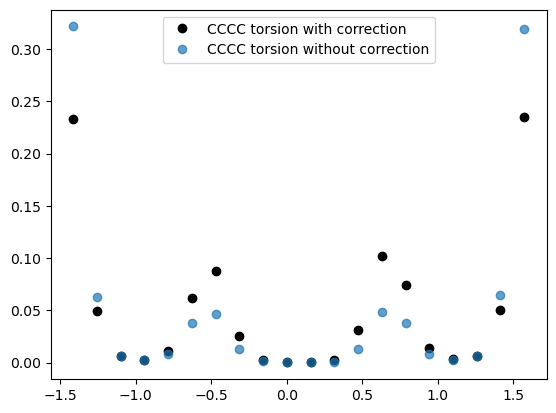

In [76]:
#Compare New Dihedral Distribution HERE)

# k3 as -1 and k2 as 1
traj_add_correction = md.load(os.path.join(workdir, "butane_sim_cor3.xtc"), top=PDB_file_name)
CCCC_torsion_c=md.compute_dihedrals(traj_add_correction, [CCCC_index])
centers, density = pdf(CCCC_torsion_c[:,0], 20, [np.min(CCCC_torsion_c), np.max(CCCC_torsion_c)]) 
plt.plot(centers, density, "o", label= "CCCC torsion with correction", color="black")

# OG
traj = md.load(os.path.join(workdir, "butane_sim.dcd"), top=PDB_file_name)
CCCC_torsion=md.compute_dihedrals(traj, [CCCC_index])
centers, density = pdf(CCCC_torsion[:,0], 20, [np.min(CCCC_torsion), np.max(CCCC_torsion)]) 
plt.plot(centers, density, "o", label= "CCCC torsion without correction", color="tab:blue", alpha=0.7)

plt.legend()


**WEEK 2 Homework Problem #3 Plot the LJ and Coulumb Forcefield Potentials for 3 types of atom pairs**

#CHECK THE COMBINATION RULES USED FOR OPENMM##


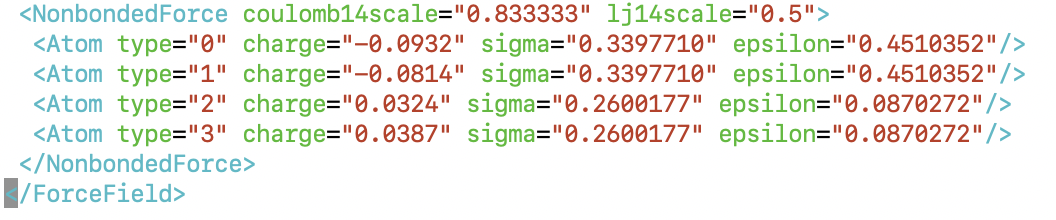




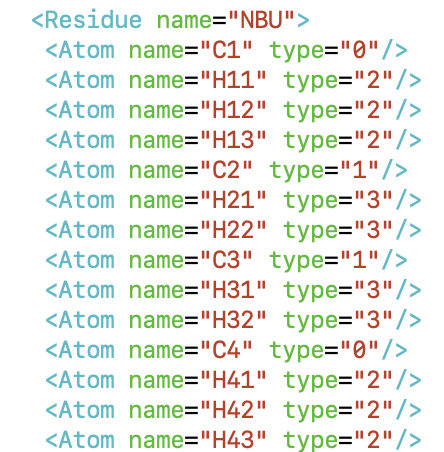

In [77]:
#Plot LJ and Couloumb Potentionals Here

# Define LJ and Coulomb functions
def lj(r, sigma, epsilon):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

def coulomb(q1, q2, r, dielectric_constant=1.0):
    return (1.0 / (4 * np.pi * dielectric_constant)) * q1 * q2 / r

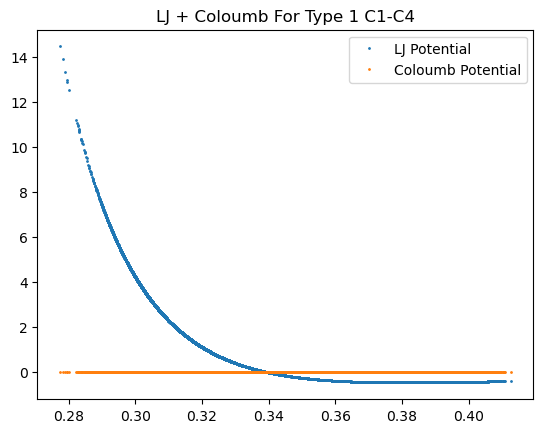

In [80]:
# end carbons are the same type [0,10] C1C4, atomtypes [0,0]
# Compute distances between the specified pair of atoms
atom_pair = np.array([[0, 10]])
distances = md.compute_distances(traj, atom_pair, periodic=True)

# Compute LJ and Coulomb potentials
sigma_value = 0.3397710  
epsilon_value = 0.4510352 
q1 = -0.0932 # Charge of the first atom
q2 = -0.0932  # Charge of the second atom

lj_potentials = lj(distances, sigma_value, epsilon_value)
coulomb_potentials = coulomb(q1, q2, distances)

plt.plot(distances, lj_potentials, linestyle="None", marker="o", markersize=1.0, label="LJ Potential")
plt.plot(distances, coulomb_potentials, linestyle="None", marker="o", markersize=1.0, label="Coloumb Potential")


plt.title ('LJ + Coloumb For Type 1 C1-C4')
plt.legend()

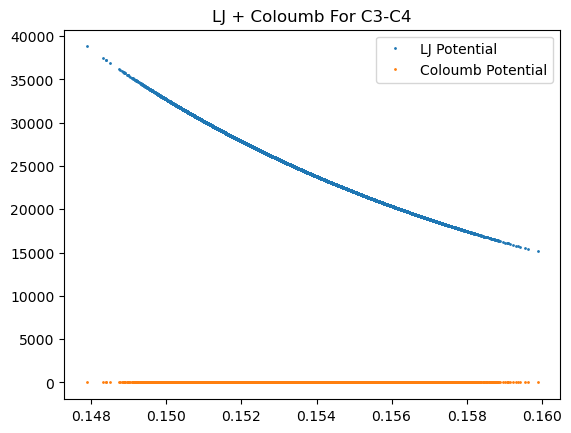

In [81]:
# side-by-side carbons [7,10] C3-C4, atomtypes [1,0]
atom_pair = np.array([[7, 10]])
distances = md.compute_distances(traj, atom_pair, periodic=True)

# Compute LJ and Coulomb potentials
sigma_value = 0.3397710  
epsilon_value = 0.4510352  
q1 = -0.0814 
q2 = -0.0932  

lj_potentials = lj(distances, sigma_value, epsilon_value)
coulomb_potentials = coulomb(q1, q2, distances)

plt.plot(distances, lj_potentials, linestyle="None", marker="o", markersize=1.0, label="LJ Potential")
plt.plot(distances, coulomb_potentials, linestyle="None", marker="o", markersize=1.0, label="Coloumb Potential")


plt.title ('LJ + Coloumb For C3-C4')
plt.legend()

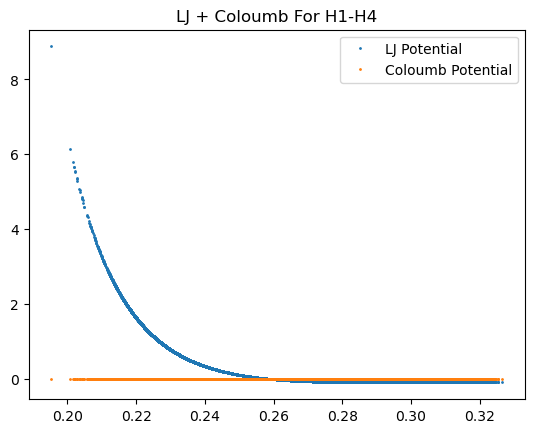

In [82]:
# HH pair  [2,6] H1-H4, atomtypes [2,3]
atom_pair = np.array([[2,6]])
distances = md.compute_distances(traj, atom_pair, periodic=True)

# Compute LJ and Coulomb potentials
sigma_value = 0.260017 
epsilon_value = 0.08702  
q1 = 0.0324 
q2 = 0.0387 

lj_potentials = lj(distances, sigma_value, epsilon_value)
coulomb_potentials = coulomb(q1, q2, distances)

plt.plot(distances, lj_potentials, linestyle="None", marker="o", markersize=1.0, label="LJ Potential")
plt.plot(distances, coulomb_potentials, linestyle="None", marker="o", markersize=1.0, label="Coloumb Potential")

plt.title ('LJ + Coloumb For H1-H4')
plt.legend()